In [3]:
#This project uses as a reference the Udemy Machine Learning and Data Science Coruse by Jose Portilla:
#Python for Data Science and Machine Learning Bootcamp

#Este projeto tem como referência o curso Python for Data Science and Machine Learning Bootcamp de Jose Portilla da Udemy :
#Python for Data Science and Machine Learning Bootcamp

#@author: Gabriel Samarane Ribeiro
#@date: 08-05-2024

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
df = pd.read_csv('../Data/911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [8]:
df.drop('e',axis=1,inplace=True)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [9]:
#Top 5 zip codes that appeared the most on 911 calss

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
#Top 5 Township codes that appeared the most on 911 calss

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [11]:
#Amount of different reasons for 911 calls on the database

len(df['title'].unique())

#OR

df['title'].nunique()

110

In [12]:
#Creating another column for the reasons of the calls being divided in FIRE, EMS OR TRAFFIC

#Using a defined function
def get_reason(x):
    return x[:x.find(":")]
df['Reasons'] = df['title'].apply(get_reason)


#Using Lambda Expression

df['Reasons'] = df['title'].apply(lambda x : x[:x.find(":")])

df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire


In [13]:
#Now it`s easier to find the top reasons for calling 911

df['Reasons'].value_counts().head(3)

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

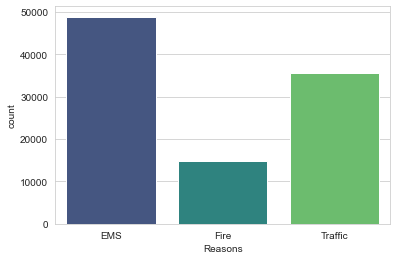

In [14]:
#Plotting these top reasons for visualization

sns.countplot(data=df,x='Reasons',palette="viridis")

In [15]:
#Changing the type of the timeStamp objetcs to actual date time data
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
#Creating new columns to easily access the time stamps

df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['WeekDay'] = df['timeStamp'].apply(lambda x : x.dayofweek)
df['Year'] = df['timeStamp'].apply(lambda x : x.year)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Hour,Month,WeekDay,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,3,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,3,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,3,2015


In [17]:
#Renaming the elements on the WeekDay column to the actual week day names
dic = {0: 'Mon', 1: 'Tue', 2: 'Wen', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['WeekDay'] = df['WeekDay'].map(dic)

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Hour,Month,WeekDay,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,Traffic,11,8,Wen,2016
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,Traffic,11,8,Wen,2016
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,11,8,Wen,2016
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,EMS,11,8,Wen,2016


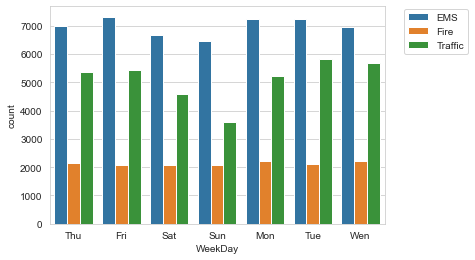

In [18]:
#Plot for how many times each type of call (Reason) happened with respect to the week day

sns.countplot(data=df, x = 'WeekDay', hue='Reasons')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

<AxesSubplot:xlabel='Reasons', ylabel='count'>

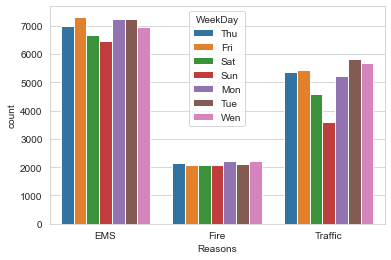

In [19]:
#Same plot but with reasons plotted on the x-axis

sns.countplot(data=df, x = 'Reasons', hue='WeekDay')

In [20]:
df.head(10000)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Hour,Month,WeekDay,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40.205293,-75.255032,MEETINGHOUSE RD & DEKALB PIKE; LOWER GWYNEDD;...,19454.0,EMS: HEAD INJURY,2016-01-06 15:12:01,LOWER GWYNEDD,MEETINGHOUSE RD & DEKALB PIKE,EMS,15,1,Wen,2016
9996,40.135347,-75.363820,HOOVER AVE & HIGHLAND AVE; WEST NORRITON; Sta...,19403.0,EMS: SEIZURES,2016-01-06 15:12:01,WEST NORRITON,HOOVER AVE & HIGHLAND AVE,EMS,15,1,Wen,2016
9997,40.003801,-75.257968,WOODSIDE AVE & GROVE PL; NARBERTH; 2016-01-06 ...,19072.0,Fire: FIRE INVESTIGATION,2016-01-06 15:12:01,NARBERTH,WOODSIDE AVE & GROVE PL,Fire,15,1,Wen,2016
9998,40.119255,-75.236238,RT309 EXPY & E VALLEY GREEN RD OVERPASS; WHITE...,NaN,Traffic: VEHICLE ACCIDENT -,2016-01-06 15:12:02,WHITEMARSH,RT309 EXPY & E VALLEY GREEN RD OVERPASS,Traffic,15,1,Wen,2016


In [21]:
#Extracting how the rate for each reason changed as the months passed

#The data on the time stamp columns are ordered by time, thus, we can say that this data has a time scope of
# 9 months, since the data begins at moth 12 2015 and ends at month 8 2016

#By that, we can create a column to represent the "index" value of each month as if it were an array of months

newMonths = {12:1,1:2,2:3,3:4,4:5,5:6,6:7,7:8,8:9}

df['numMonths'] =  df['Month'].map(newMonths)

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Hour,Month,WeekDay,Year,numMonths
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,Thu,2015,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,Thu,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,Traffic,11,8,Wen,2016,9
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,Traffic,11,8,Wen,2016,9
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,EMS,11,8,Wen,2016,9
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,EMS,11,8,Wen,2016,9


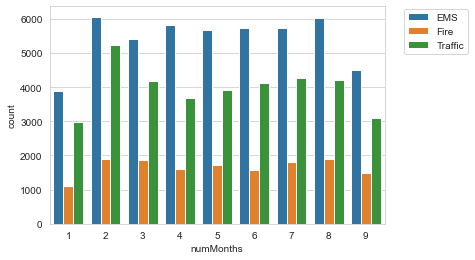

In [22]:
#Plotting 

#This represents the change in calls throughout the months 

sns.countplot(data=df,x='numMonths',hue='Reasons')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

<AxesSubplot:xlabel='numMonths', ylabel='count'>

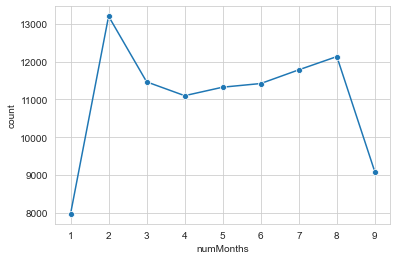

In [23]:
#This creates a new dataFrame with the amount of calls that occured each of the 9 months an then plots it 

value_counts = df['numMonths'].value_counts()
plot_data = value_counts.reset_index()
plot_data.columns = ['numMonths', 'count']
sns.lineplot(x='numMonths',y='count',data=plot_data, marker = 'o')

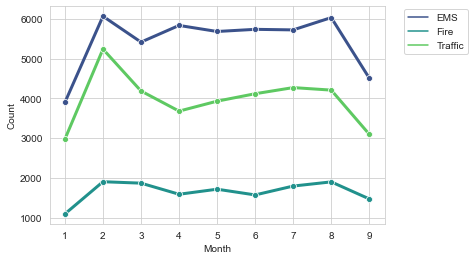

In [24]:
#Plotting the number of calls throughout the months for EACH individual Reason

grouped = df.groupby(['numMonths', 'Reasons']).size().reset_index()
grouped.columns = ['Month','Reason','Count']
sns.lineplot(x='Month',y='Count', hue = 'Reason', data=grouped, marker = 'o', palette = 'viridis', linewidth = 3.0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)

In [25]:
#Creating a new column for each day
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Hour,Month,WeekDay,Year,numMonths,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,Thu,2015,1,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,Thu,2015,1,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,Thu,2015,1,2015-12-10


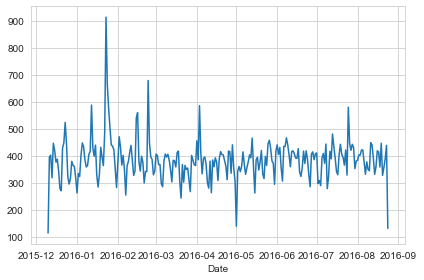

In [33]:
#Creating a new groupby DF that has the date column as its index, showing the amount of times each column had a non-NaN value
#for each index (day) value, which essentially shows how many calls where made that day
df_new = df.groupby('Date').count()
df_new['lat'].plot()
plt.tight_layout()

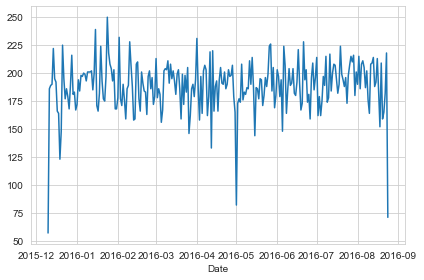

In [27]:
#Recreating the same plot but ONLY with calls that had EMS as a Reason

df_new = df[df['Reasons'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

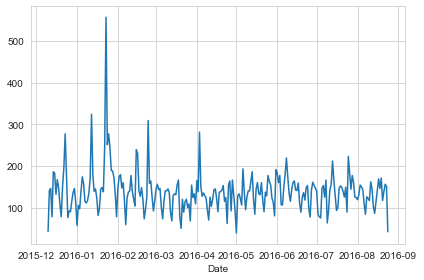

In [34]:
#Recreating the same plot but ONLY with calls that had Traffic as a Reason

df_new = df[df['Reasons'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

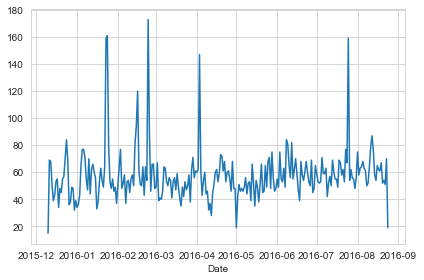

In [35]:
#Recreating the same plot but ONLY with calls that had Fire as a Reason

df_new = df[df['Reasons'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [51]:
teste = df.groupby(['WeekDay','Hour']).count()['lat']
teste.unstack()
teste

WeekDay  Hour
Fri      0       275
         1       235
         2       191
         3       175
         4       201
                ... 
Wen      19      686
         20      668
         21      575
         22      490
         23      335
Name: lat, Length: 168, dtype: int64